<a href="https://colab.research.google.com/github/RithwikMohan/ML_Lab/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

Mean Absolute Error (MAE): 2133.620689655174
Mean Squared Error (MSE): 5817962.247324619
Root Mean Squared Error (RMSE): 2412.0452415584205
R² Score: 0.9838837610877434
Equation of line: Salary = 4818.97 * YearsExperience + 26370.69


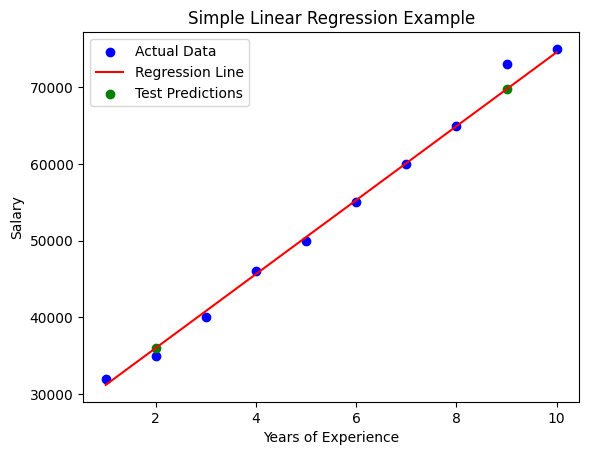

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.DataFrame({
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [32000, 35000, 40000, 46000, 50000,
               55000, 60000, 65000, 73000, 75000]
})

X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


m = model.coef_[0]  # slope
c = model.intercept_  # intercept
print(f"Equation of line: Salary = {m:.2f} * YearsExperience + {c:.2f}")

# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(X_test, y_pred, color='green', label='Test Predictions')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression Example")
plt.legend()
plt.show()


Mean Absolute Error (MAE): 43.27745202531506
Mean Squared Error (MSE): 2859.69634758675
Root Mean Squared Error (RMSE): 53.47612876402657
R-squared (R2): 0.5177484222203499
Adjusted R-squared: 0.5065592904853232
Prediction for new sample: 206.12

Actual vs Predicted Values:
Actual: 151.00 	 Predicted: 206.12
Actual: 75.00 	 Predicted: 68.07
Actual: 141.00 	 Predicted: 176.88
Actual: 206.00 	 Predicted: 166.91
Actual: 135.00 	 Predicted: 128.46
Actual: 97.00 	 Predicted: 106.35
Actual: 138.00 	 Predicted: 73.89
Actual: 63.00 	 Predicted: 118.85
Actual: 110.00 	 Predicted: 158.81
Actual: 310.00 	 Predicted: 213.58


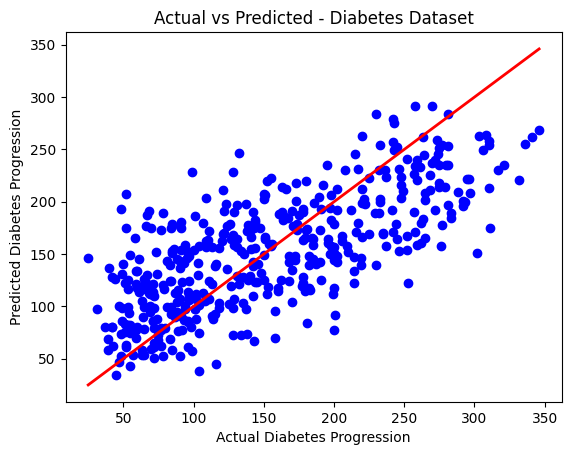

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

n = len(y)#no of samples
k = X.shape[1]#no of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)#for maintaining the productiveness of r2 when new features are added

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

new_data = X[0].reshape(1, -1)#first patient
new_prediction = model.predict(new_data)
print(f"Prediction for new sample: {new_prediction[0]:.2f}")

print("\nActual vs Predicted Values:")
for i in range(10):
    print(f"Actual: {y[i]:.2f} \t Predicted: {y_pred[i]:.2f}")

plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs Predicted - Diabetes Dataset")
plt.show()


# Polynomial regression

Polynomial Regression (degree 2):
MAE: 52.38391176015265
MSE: 4085.0254808716318
RMSE: 63.914204061942534
R² Score: 0.2289715971205668


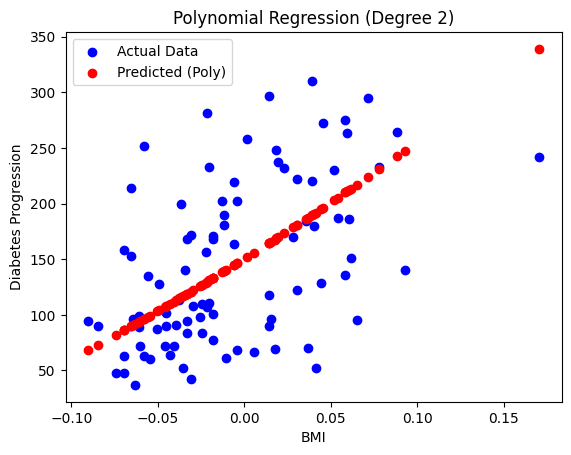


Actual vs Predicted Values (sample):
   Actual   Predicted
0   219.0  144.316524
1    70.0  187.378539
2   202.0  146.402244
3   230.0  203.120506
4   111.0  130.932229
5    84.0  126.874273
6   242.0  338.900457
7   272.0  196.331392
8    94.0   68.505759
9    96.0  165.492896


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data[:, 2].reshape(-1, 1)   #taking just BMI feature[2nd col] for visualization
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation->degree 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)# means to convert to curve of degree 2 y=β0​+β1​x+β2​x2
X_train_poly = poly_features.fit_transform(X_train)#1st col bias term 2nd col x 3rd col x2 then the model predicts β0,β1 and β2
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression (degree 2):")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.scatter(X_test, y_pred, color="red", label="Predicted (Poly)")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print("\nActual vs Predicted Values (sample):")
print(results.head(10))

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)

data1 = pd.DataFrame({
    'Age': np.random.randint(18, 60, 50),
    'Height': np.random.randint(150, 190, 50),
    'Weight': np.random.randint(50, 100, 50),
    'TimeOnExercise': np.random.randint(1, 10, 50),
})

data1['WeightReduction'] = (#target column linearly depending on other cols
    0.2 * data1['Age']
    + 0.5 * data1['Height']
    + 1.5 * data1['Weight']
    + 2.0 * data1['TimeOnExercise']
    + np.random.normal(0, 10, 50)#random noise to make it realistic
)

X1 = data1[['Age', 'Height', 'Weight', 'TimeOnExercise']]
y1 = data1['WeightReduction']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

print("\nWeight Reduction Model")
print("MAE:", mean_absolute_error(y1_test, y1_pred))
print("MSE:", mean_squared_error(y1_test, y1_pred))
print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))
print("R²:", r2_score(y1_test, y1_pred))
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
print(pd.DataFrame({'Actual': y1_test[:5], 'Predicted': y1_pred[:5]}))

data2 = pd.DataFrame({
    'Area': np.random.randint(800, 2500, 50),
    'Bedrooms': np.random.randint(1, 5, 50),
    'Bathrooms': np.random.randint(1, 3, 50),
    'Stories': np.random.randint(1, 3, 50),
})

data2['Price'] = (
    200 * data2['Area']
    + 50000 * data2['Bedrooms']
    + 40000 * data2['Bathrooms']
    + 30000 * data2['Stories']
    + np.random.normal(0, 20000, 50)
)

X2 = data2[['Area', 'Bedrooms', 'Bathrooms', 'Stories']]
y2 = data2['Price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("\nHouse Price Model")
print("MAE:", mean_absolute_error(y2_test, y2_pred))
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print("R²:", r2_score(y2_test, y2_pred))
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print(pd.DataFrame({'Actual': y2_test[:5], 'Predicted': y2_pred[:5]}))



Weight Reduction Model
MAE: 6.1647597302408315
MSE: 87.57235990689533
RMSE: 9.35801046734269
R²: 0.7135376430992311
Coefficients: [0.08596407 0.61279741 1.61547888 0.92349779]
Intercept: -17.767405792962336
        Actual   Predicted
13  225.385630  227.344776
39  205.138329  203.835453
30  225.619416  224.588978
45  168.793177  174.934684
17  198.199344  174.728523

House Price Model
MAE: 20356.327525684064
MSE: 599796772.7364769
RMSE: 24490.748717351966
R²: 0.9711684494630383
Coefficients: [  200.58161658 51927.62850107 45066.62876212 29656.17282854]
Intercept: -8641.115037641139
           Actual      Predicted
13  405231.867546  417201.160183
39  401002.212441  372854.408337
30  654101.029599  683361.647041
45  412529.433366  389302.100897
17  798083.270420  806673.320852


In [6]:
from google.colab import drive
drive.mount('/content/drive')
url1 = '/content/drive/MyDrive/Datasets/house_price_train.csv'
df1 = pd.read_csv(url1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

X2 = df1.drop(columns="SalePrice").select_dtypes(include=['number'])
y2 = df1["SalePrice"]

X2 = X2.dropna()#dropping rows with NA
y2 = y2.loc[X2.index]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=0
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("\nHouse Price Model")
print("MAE:", mean_absolute_error(y2_test, y2_pred))
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print("R²:", r2_score(y2_test, y2_pred))
print("Intercept:", model2.intercept_)
print(pd.DataFrame({'Actual': y2_test[:5].values, 'Predicted': y2_pred[:5]}))



House Price Model
MAE: 23205.04706044267
MSE: 2394683256.302307
RMSE: 48935.50098141744
R²: 0.6058426708090661
Intercept: 254130.99902280432
   Actual      Predicted
0   88000   53113.950717
1  219210  224830.216196
2  208300  170358.274205
3  190000  237439.775146
4  167000  184435.034737


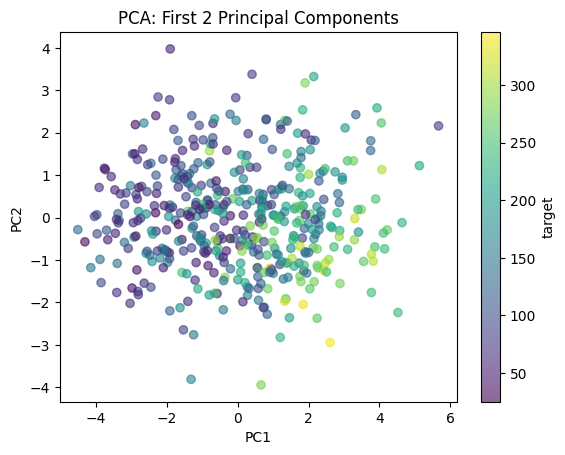


Loading scores for PC1 and PC2:
          PC1       PC2
age  0.216431  0.044367
sex  0.186967 -0.386547
bmi  0.303162 -0.156281
bp   0.271738 -0.138266
s1   0.343255  0.573027
s2   0.351861  0.455942
s3  -0.282437  0.506239
s4   0.428834 -0.068181
s5   0.378618 -0.026187
s6   0.322183 -0.084949

Top 2 variables for PC1: ['s4', 's5']
Top 2 variables for PC2: ['s1', 's3']

Variance explained by PC1 and PC2:
[0.40242108 0.14923197]

Number of PCs explaining >80% variance: 5


In [8]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# Loading dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Features & target
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


# (a) Standardize the variables in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (b) Apply PCA and create a scatter plot with PC1 and PC2 as axes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)#all rows of the first principal component (PC1) and all rows of the second principal component (PC21)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First 2 Principal Components")
plt.colorbar(label='target')
plt.show()

# (c) Identify the most important variables for PC1 and PC2
loading_scores = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PC1', 'PC2'])#pca.components_=>PC1: [0.5, 0.7, 0.5....],PC2: [-0.4, 0.1, 0.9.....]
print("\nLoading scores for PC1 and PC2:")
print(loading_scores)

# Highlight top 2 contributing variables for each PC
top_pc1 = loading_scores['PC1'].abs().sort_values(ascending=False).head(2)
top_pc2 = loading_scores['PC2'].abs().sort_values(ascending=False).head(2)
print("\nTop 2 variables for PC1:", top_pc1.index.tolist())
print("Top 2 variables for PC2:", top_pc2.index.tolist())

# (d) Percentage of variance explained by PC1 and PC2
print("\nVariance explained by PC1 and PC2:")
print(pca.explained_variance_ratio_)

# (e) Number of PCs that explain more than 80% of total variance
pca_full = PCA()#keeps all features->so total n
X_pca_full = pca_full.fit_transform(X_scaled)#transformed data in the full PC space
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()#cumsum for each pc arr
n_components_80 = (cumulative_variance < 0.8).sum() + 1#we do +1 because whereve we reached  cum sum<=80 tht feature also contributes
print("\nNumber of PCs explaining >80% variance:", n_components_80)


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open salary.zip, salary.zip.zip or salary.zip.ZIP.


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Datasets/Santander Customer Satisfaction_train.csv")
X = data[['YearsExperience']]
y = data['Salary']

model = LinearRegression()
model.fit(X, y)

print("Coefficient (change in salary per year):", model.coef_[0])
print("Intercept:", model.intercept_)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


KeyError: "None of [Index(['YearsExperience'], dtype='object')] are in the [columns]"

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
data = pd.read_csv(url, names=columns)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)#1000 to make sure safe convergence
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)#shows TP, TN, FP, FN:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

TN, FP, FN, TP = cm.ravel()
manual_accuracy = (TP + TN) / (TP + TN + FP + FN)
manual_precision = TP / (TP + FP) if (TP + FP) != 0 else 0
manual_recall = TP / (TP + FN) if (TP + FN) != 0 else 0
manual_f1 = 2 * manual_precision * manual_recall / (manual_precision + manual_recall) if (manual_precision + manual_recall) != 0 else 0

print("\nManual Calculation:")
print("Accuracy:", manual_accuracy)
print("Precision:", manual_precision)
print("Recall:", manual_recall)
print("F1 Score:", manual_f1)


Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682

Manual Calculation:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
